# Compare Lagrangian Results Files Between MIDOSS-MOHID Runs

This notebook is for quick comparison of results from `Lagrangian*.nc` files
from 2 MIDOSS-MOHID runs.

This is a template version of the notebook that compares one dataset to itself.

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import xarray

In [3]:
results = {
    "01-07jun17": Path(
        "/media/doug/warehouse/MIDOSS/results/01jun17-08jun17/forcing-float32_no-comp_no-chunk//Lagrangian_AKNS_crude_SOG_01jun2017_08jun2017_AKNS.nc"),
    "15-21jun17": Path(
        "/media/doug/warehouse/MIDOSS/results/15jun17-21jun17/AKNS-spatial-0-231/Lagrangian_AKNS_crude_15jun17_22jun17_AKNS.nc"),
}

In [4]:
datasets = {
    name: xarray.open_dataset(path)
    for name, path in results.items()
}

In [5]:
datasets["baseline forcing"]

<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 167)
Coordinates:
  * time                 (time) datetime64[ns] 2017-06-01T00:30:00 ... 2017-06-07T22:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Fri Dec 13 13:55:25 2019: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Fri Dec 13 13:55:25 2019: Appended file /loca...

In [ ]:
for name in datasets:
    print(name)
    print(f"{datasets[name]}\n")

01-07jun17
<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 167)
Coordinates:
  * time                 (time) datetime64[ns] 2017-06-01T00:30:00 ... 2017-06-07T22:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Tue Dec 17 23:05:59 2019: ncks -4 -L4 -A /loc...
    NCO:                       

In [23]:
def viz_field(datasets, var, selections, robust=False):
    if len(selections) == 1:
        fig, (ax0, ax1, ax_diff) = plt.subplots(1, 3, figsize=(20, 5))
    else:
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
    ds_names = list(datasets.keys())
    ds0 = datasets[ds_names[0]].get(var).sel(**selections[0])
    try:
        ds1 = datasets[ds_names[1]].get(var).sel(**selections[1])
    except IndexError:
        ds1 = datasets[ds_names[1]].get(var).sel(**selections[0])
    ds0.plot(ax=ax0, robust=robust)
    ax0.set_title(f"{ds_names[0]}\n{ax0.get_title()}")
    ds1.plot(ax=ax1, robust=robust)
    ax1.set_title(f"{ds_names[1]}\n{ax1.get_title()}")
    if len(selections) == 1:
        (ds0 - ds1).plot(ax=ax_diff, cmap=plt.cm.RdBu_r, robust=robust)
        ax_diff.set_title(f"{ds_names[0]} - {ds_names[1]}\n{ax_diff.get_title()}")
    plt.tight_layout()

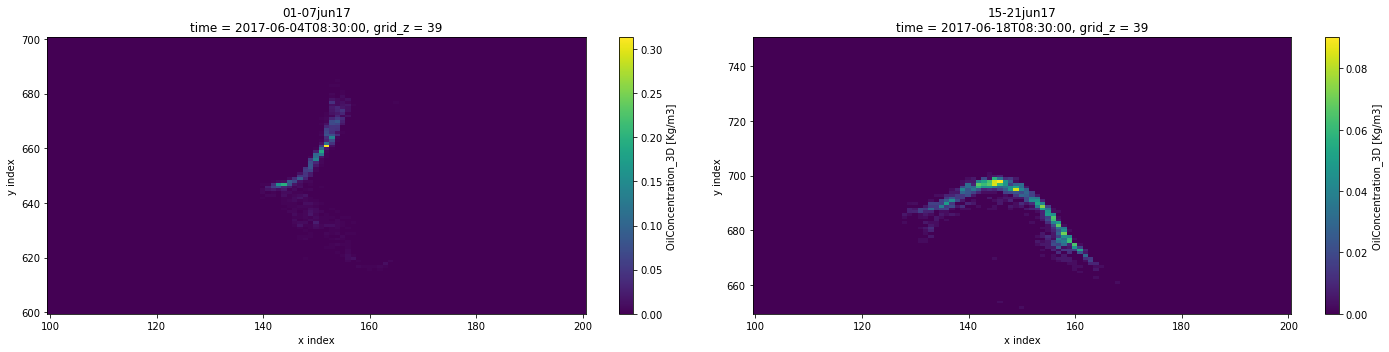

In [24]:
selections = [
    dict(
        time="2017-06-04 08:30:00",
        grid_y=slice(600, 700),
        grid_x=slice(100, 200),
        # depth axis is inverted, so that surface has index 39
        grid_z=39,
    ),
    dict(
        time="2017-06-18 08:30:00",
        grid_y=slice(650, 750),
        grid_x=slice(100, 200),
        # depth axis is inverted, so that surface has index 39
        grid_z=39,
    ),
]
viz_field(datasets, "OilConcentration_3D", selections, robust=False)

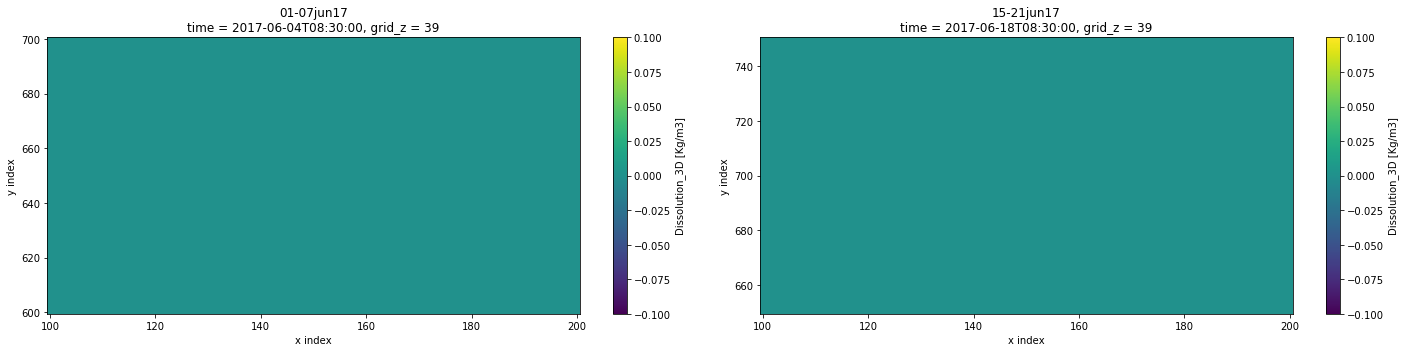

In [25]:
viz_field(datasets, "Dissolution_3D", selections)

In [26]:
for ds in datasets.values():
    ds.close()